# Portfolio Choice 1

This notebook analyses the effect of leverage and diversification on the portfolio performance, and solves a first (simple) optimal portfolio choice problem.

## Load Packages and Extra Functions

In [1]:
using Printf 

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

#pyplot(size=(600,400))      #pyplot() or gr()
gr(size=(480,320))
default(fmt = :png)          #or :svg

# Leverage: A Risky and a Riskfree Asset

Suppose you can invest in a risky asset (with return $R$, expected return $\mu$ and standard deviation $\sigma$) and also in a riskfree asset (at the rate $R_f$). 

With the portfolio weight $v$ on the risky asset, the portfolio return is

$R_p = v R + (1-v)R_f$.

$v>1$ is called leverage (and it is financed by borrowing at the rate $R_f$).

The average and standard deviation of the portfolio are

$\text{E}R_p = v \mu + (1-v)R_f$ 

and 

$\text{Std}(R_p) = |v|\sigma$

By considering different values of $v$, we can show what sort of combinations of $\text{E}R_p$ and $\text{Std}(R_p)$ that can be achieved.

# Remarks on the Code:

1. if `v=0.2`, then `println("hello is $v")` will print `hello is 0.2`
2. if `v_range=[0.5,0.25]`, then `1.0 .- v_range` will give `[1-0.5,1-0.25]`.

In [3]:
μ  = 9.5/100  #expected return of the risky asset
σ  = 8/100    #std of the risky asset
Rf = 3/100    #risk free return (interest rate)
v  = 0.5

ERₚ   = v*μ + (1 - v)*Rf
StdRₚ = abs(v)*σ

printlnPs("ERₚ and Std(Rₚ) when v=$v:",ERₚ,StdRₚ)

ERₚ and Std(Rₚ) when v=0.5:     0.062     0.040


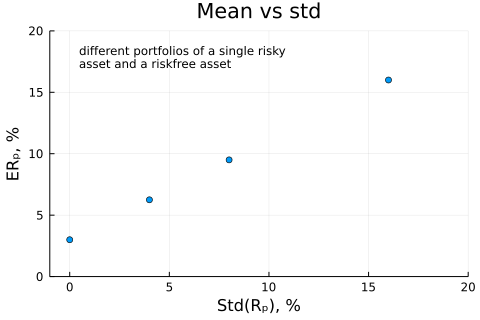

In [4]:
v_range = [0,0.5,1,2]            #a vector, trying different weights on the risky asset 
ERₚ     = v_range*μ + (1.0 .- v_range)*Rf    #a vector of the same length as v_range, notice the .-
StdRₚ   = abs.(v_range)*σ 

txt = text("different portfolios of a single risky\nasset and a riskfree asset",8,:left)

p1 = scatter( StdRₚ*100,ERₚ*100,
              legend = false,
              ylim = (0,20),
              xlim = (-1,20),
              title = "Mean vs std",
              xlabel = "Std(Rₚ), %",
              ylabel = "ERₚ, %",
              annotation = (0.5,18,txt) )
display(p1)

# Portfolio Choice: A Risky and a Riskfree Asset

Consider the "utility" $\text{E}R_p - k/2\times \text{Var}(R_p)$ as a function of the weight $v$ on the risky asset (and $1-v$ on the riskfree asset) 

The optimal portfolio weight is 

$
v = \frac{\mu - R_f}{k\sigma^2}
$

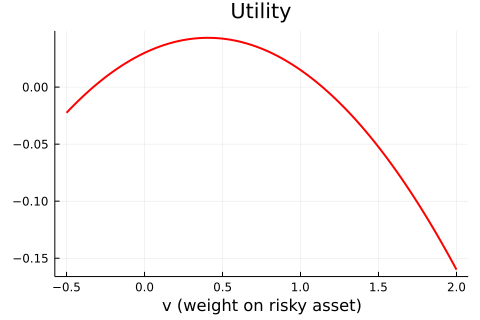

In [5]:
k     = 25      #risk aversion

v_range = range(-0.5,2,length=101)          #trying different portfolio weights
ERₚ     = v_range*μ + (1.0 .- v_range)*Rf   #a vector of the same length as v_range
VarRₚ   = v_range.^2*σ^2                    #v_range.^2 to square each element of v_range
Util    = ERₚ - k/2*VarRₚ

p1 = plot( v_range,Util,
           linecolor = :red,
           linewidth = 2,
           legend = false,
           title = "Utility",
           xlabel = "v (weight on risky asset)" )
display(p1)

In [6]:
vopt = (μ-Rf)/(k*σ^2)       #optimal solution (according to the lecture notes)

printblue("Optimal weights on risky and riskfree assets when k = $k: ")
printmat([vopt,1-vopt],rowNames=["risky","riskfree"])

printred("compare with the figure")

Optimal weights on risky and riskfree assets when k = 25: 
risky        0.406
riskfree     0.594

compare with the figure


#    Diversification

The variance of an equally weighted portfolio of *two assets* is

$\text{Var}(R_p) = \sigma_{11}/4 + \sigma_{22}/4 + \rho\sqrt{\sigma_{11}\sigma_{22}}/2,$

where $\rho$ is the correlation and $\sigma_{ii}$ the variance of asset $i$. ($\sigma^2_p$ is sometimes denoted $\sigma_{pp}$.)

More generally, the variance of an equally weighted portfolio of *n assets* is

$\text{Var}(R_p) = (\bar{\sigma}_{ii} - \bar{\sigma}_{ij})/n + \bar{\sigma}_{ij}$,

where $\bar{\sigma}_{ii}$ is the average variance (across the assets) and $\bar{\sigma}_{ij}$ is the average covariance.

In [7]:
σ₁₁ = 256/100^2
σ₂₂ = σ₁₁             #assume the same variance of the two assets
ρ   = 0.5

VarRₚ = σ₁₁/4 + σ₂₂/4 + ρ*sqrt(σ₁₁*σ₂₂)/2

printmat([σ₁₁;VarRₚ],rowNames=["Individual variance","portfolio variance"])

Individual variance     0.026
portfolio variance      0.019



In [8]:
σᵢᵢ_avg = σ₁₁                       #average variance
σᵢⱼ_avg = ρ*sqrt(σᵢᵢ_avg*σᵢᵢ_avg)   #average covariance
n_range       = 1:49                      #try all these values of n

VarRₚ = (σᵢᵢ_avg-σᵢⱼ_avg)./n_range .+ σᵢⱼ_avg     #variance of equally weighted portfolio

printblue("Portfolio variance and std, n = 1 to 3")
printmat([VarRₚ[1:3] sqrt.(VarRₚ[1:3])],colNames=["var","std"],rowNames=1:3,cell00="n")

Portfolio variance and std, n = 1 to 3
n       var       std
1     0.026     0.160
2     0.019     0.139
3     0.017     0.131



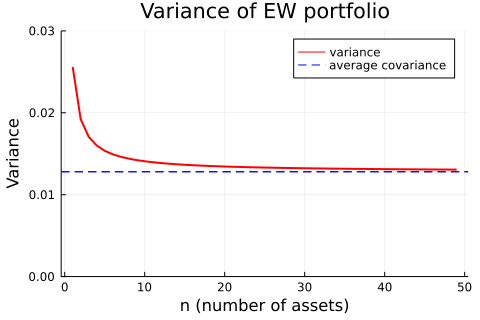

In [9]:
p1 = plot( n_range,VarRₚ,
           linecolor = :red,
           linewidth = 2,
           ylim = (0,0.03),
           label = "variance",
           title = "Variance of EW portfolio",
           xlabel = "n (number of assets)",
           ylabel = "Variance" )
hline!([σᵢⱼ_avg;σᵢⱼ_avg],line=(:dash,1),linecolor=:blue,label="average covariance")
display(p1)

# Calculate the Average Correlation (extra)

#### A Remark of the Code
`tril(C,-1)` creates a new matrix where all $n(n-1)/2$ elements below the main diagonal are kept, and all other elements are replaced by zeros.

In [10]:
using LinearAlgebra

C = [1     0.50  0.25;         #a correlation matrix
     0.50  1     0.10;
     0.25  0.10  1   ]

n = size(C,1)
c_avg = sum(tril(C,-1))/(n*(n-1)/2)    #average of the n(n-1)/2
printlnPs(c_avg)                       #numbers below the main diagonal

     0.283
